In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import downloader

In [2]:
mypath = "set/"

In [ ]:
downloader.download(mypath) #Only run if you don't already have a dataset

In [3]:
for c in ['red','blue','black','green','white']:
    verify_images("{}/{}".format(mypath, c), True)

In [4]:
data = ImageDataBunch.from_folder(mypath, valid_pct = 0.2, size=224,bs = 32, ds_tfms=get_transforms()).normalize(imagenet_stats)

In [5]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


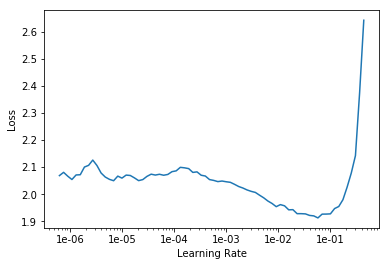

In [7]:
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.623076,1.359433,0.526052
2,1.392413,1.231907,0.485972
3,1.270244,1.220231,0.468938
4,1.145662,1.210929,0.464930


In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


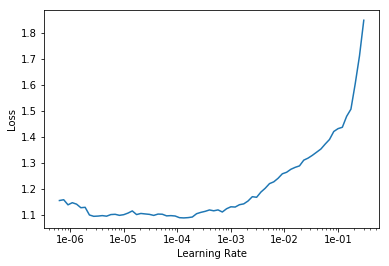

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.154223,1.198068,0.460922
2,1.103197,1.161635,0.436874
3,1.082977,1.131568,0.435872
4,1.036677,1.108427,0.420842
5,1.001337,1.104639,0.423848


In [13]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.995860,1.079087,0.410822


In [14]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.981194,1.062380,0.407816


In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.956951,1.043179,0.396794
2,0.910346,1.020315,0.398798
3,0.896570,0.984277,0.373747
4,0.837999,0.981129,0.377756
5,0.799253,0.974835,0.369739


In [16]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.808728,0.972372,0.380762
2,0.793176,0.957689,0.367735
3,0.756513,0.957508,0.363727
4,0.721451,0.947423,0.361723
5,0.706633,0.956019,0.369739


In [17]:
learn.save("model")